In [ ]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Population Distribution

In [ ]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)

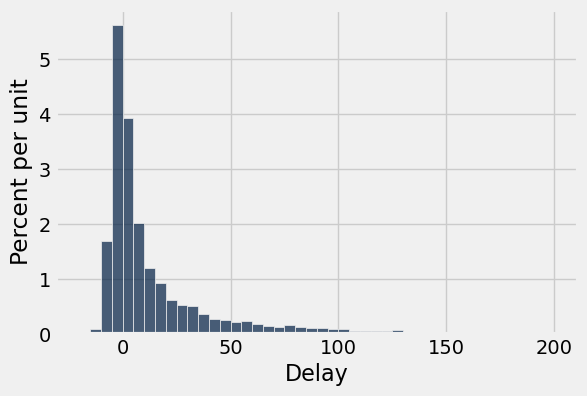

In [ ]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

In [ ]:
# (Population) Parameter
pop_median = np.median(united.column('Delay'))
pop_median

2.0

## Sample Statistic

In [ ]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [ ]:
sample_median(100)

5.0

## Empirical Distributions of a Statistic

In [ ]:
num_simulations = 5000

sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(100)
    sample_medians = np.append(sample_medians, new_median)

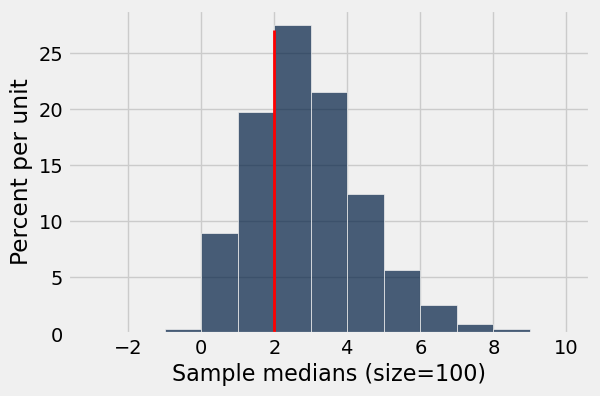

In [ ]:
sampling_bins = np.arange(-3, 11, 1)

Table().with_column('Sample medians (size=100)', sample_medians).hist(bins = sampling_bins)
plots.plot([pop_median, pop_median], [0,.27], color='red', lw=2);

## Bootstrapping

In [ ]:
our_sample = united.sample(100, with_replacement=False)
our_sample

Row,Date,Flight Number,Destination,Delay
8103,7/24/15,1927,IAH,1
9655,8/4/15,394,LAS,-1
5413,7/7/15,1178,PDX,5
9072,7/31/15,624,ORD,4
11636,8/16/15,1774,IAD,7
10492,8/9/15,1198,ORD,21
1220,6/9/15,500,LAX,5
11347,8/14/15,1686,DCA,-4
1784,6/12/15,1705,ORD,-1
7782,7/22/15,1927,IAH,16


In [ ]:
our_sample_median = np.median(our_sample.column('Delay'))
our_sample_median

2.0

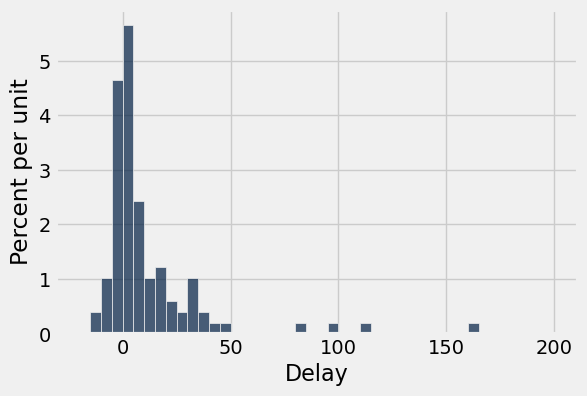

In [ ]:
our_sample.hist('Delay', bins=united_bins)

Population Median =        2.0
Our Sample Median =        2.0
Bootstrap Sample Median =  2.0


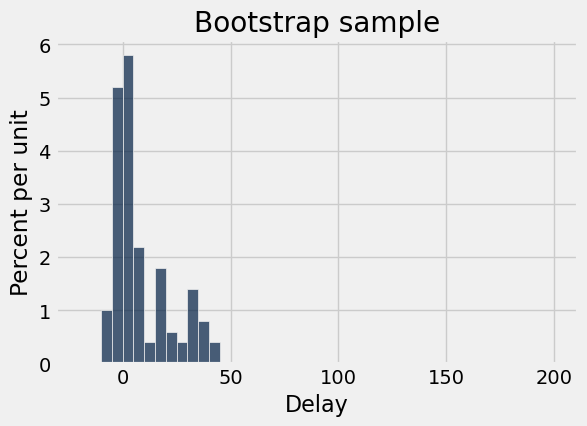

In [ ]:
# Take a bootstrap (re)sample of size 100, WITH replacement

boot_sample = our_sample.sample(100, with_replacement=True)
boot_sample.hist('Delay', bins=united_bins)
plots.title('Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", np.median(boot_sample.column('Delay')))

## Bootstrap Distribution

In [ ]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return np.median(single_sample.column('Delay'))

In [ ]:
bootstrap_medians = make_array()

for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

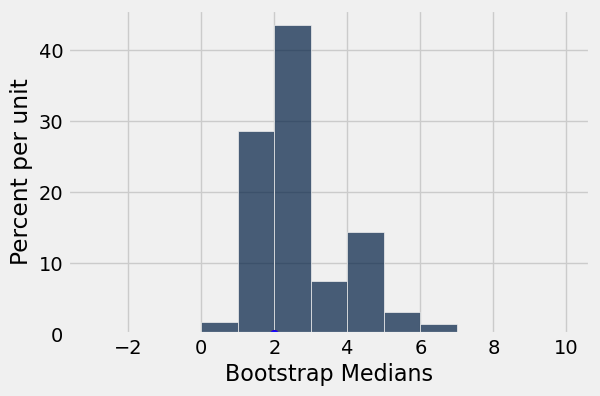

In [ ]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist(
    'Bootstrap Medians', bins = sampling_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");

## Percentiles

In [ ]:
# Manually compute the 55th percentile.
x = make_array(43, 20, 51, 7, 28, 34)

In [ ]:
# Step 1. Sort the data
np.sort(x)

array([ 7, 20, 28, 34, 43, 51])

In [ ]:
# Step 2. Figure out where 55th percentile would be.

np.ceil(55/100 * 6)

4.0

In [ ]:
np.sort(x).item(4 - 1)

34

In [ ]:
# OR: 1 Line of Code
percentile(55, x)

34

## Confidence Intervals

In [ ]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

left, right

(1.0, 5.0)

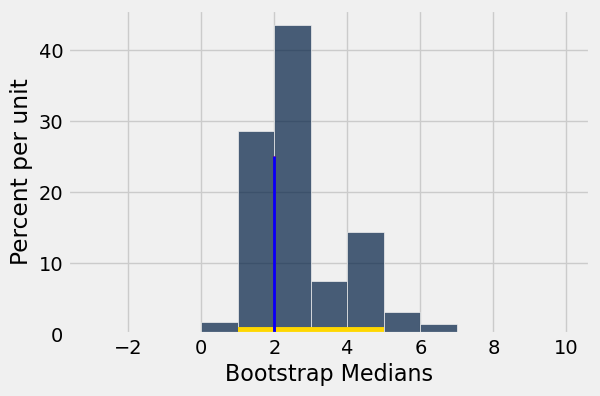

In [ ]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins = sampling_bins)

plots.plot([left, right], [0,0], color="gold",lw=10, zorder=1);
plots.plot([pop_median, pop_median], [0,0.25], color="red",lw=2, zorder=1);
plots.plot([our_sample_median, our_sample_median], [0,0.25], color="blue",lw=2, zorder=1);